# Phase Synchonization Analysis

In [1]:
import importlib

# List of libraries to check
libraries = [
    'numpy',
    'matplotlib',
    'scipy',
    'torch',
    'torchdiffeq',
    'torchsummary',
    'minepy',
    'pyrqa',
    'pyts',
    'MFDFA',
    'pyinform',
    'graphviz',
    'fa2',
    'networkx'
]

for lib in libraries:
    try:
        module = importlib.import_module(lib)
        version = getattr(module, '__version__', 'Unknown version')
        print(f'{lib}: {version}')
    except ImportError:
        print(f'{lib} is not installed.')

numpy: 1.24.3
matplotlib: 3.7.0
scipy: 1.10.1
torch: 2.0.1+cu117
torchdiffeq: 0.2.3
torchsummary: Unknown version
minepy: b'1.2.6'
pyrqa: Unknown version
pyts: 0.12.0
MFDFA: 0.4.3
pyinform: Unknown version
graphviz: 0.20.1
fa2 is not installed.
networkx: 3.0


# Phase Locking Values

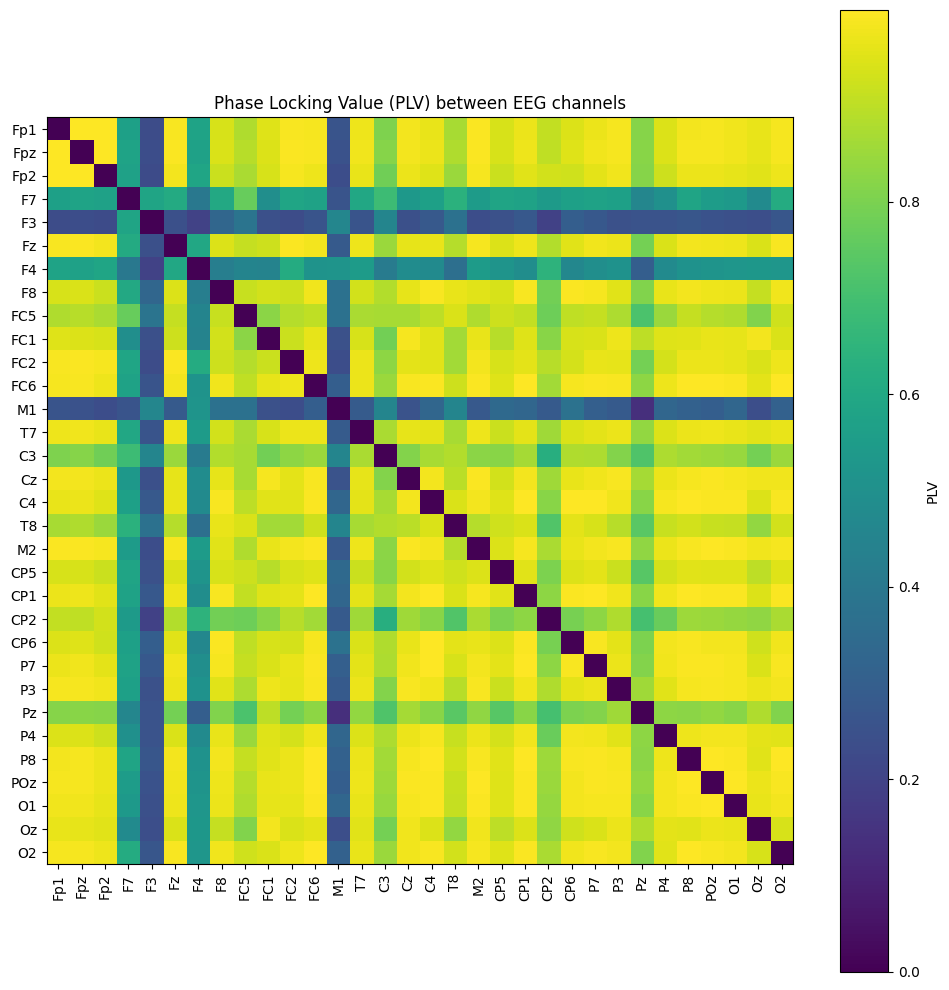

In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from scipy.signal import hilbert

def compute_phase_locking_value(signal1, signal2):
    phase1 = np.angle(hilbert(signal1))
    phase2 = np.angle(hilbert(signal2))
    phase_diff = phase1 - phase2
    PLV = abs(np.sum(np.exp(1j * phase_diff))) / len(phase_diff)
    return PLV

# Load EEG data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

eeg_channel_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                    'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

num_channels = len(eeg_channel_names)
plv_matrix = np.zeros((num_channels, num_channels))

for i, j in itertools.combinations(range(num_channels), 2):
    plv_matrix[i, j] = compute_phase_locking_value(EEG_data[:, i], EEG_data[:, j])
    plv_matrix[j, i] = plv_matrix[i, j]

# Save the PLV matrix
save_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Syncronization/plv_matrix.npy"
np.save(save_path, plv_matrix)

# Plot the PLV matrix
plt.figure(figsize=(10, 10))
plt.imshow(plv_matrix, cmap="viridis", interpolation="none")
plt.colorbar(label="PLV")
plt.title("Phase Locking Value (PLV) between EEG channels")
plt.xticks(np.arange(num_channels), eeg_channel_names, rotation=90)
plt.yticks(np.arange(num_channels), eeg_channel_names)

# Save the plot
plot_save_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Syncronization/plots/plv_plot.png"
plt.tight_layout()
plt.savefig(plot_save_path, dpi=300)
plt.show()